## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.
https://stackoverflow.com/questions/22991567/pandas-yahoo-finance-datareader

In [3]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader.data as web
import datetime   

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 12, 31)
df = web.DataReader("AAPL", 'yahoo', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['dates'] = pd.to_datetime(dates, format='%Y-%m-%d')
print (df.head())
print (df.tail())

In [ ]:
web.get_qote_av

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [ ]:
Q1 = np.percentile(df['High'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['High'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = df['High'] >= (Q3+1.5*IQR)
 
print(np.where(upper))
 
# Below Lower bound
lower = df['High'] <= (Q1-1.5*IQR)
print(np.where(lower))
df.High.plot(figsize=(12,6))

## Лабораторная работа №5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

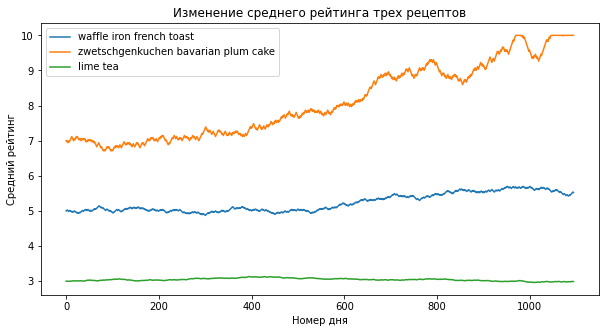

In [43]:
data = np.load('/content/average_ratings.npy')
plt.figure(figsize=(10, 5))
plt.plot(data[0], label='waffle iron french toast')
plt.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(data[2], label='lime tea')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


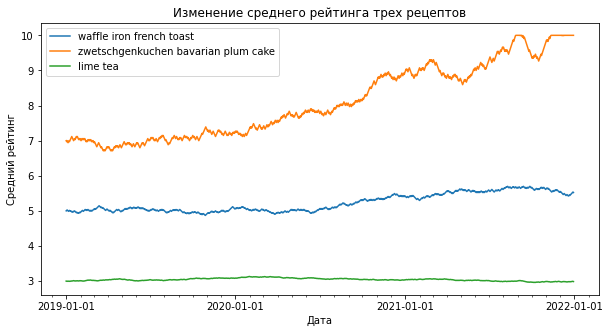

In [44]:
dr = pd.date_range(start='01.01.2019', end='30.12.2021')
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=1)

ax.plot(dr, data[0], label='waffle iron french toast')
ax.plot(dr, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dr, data[2], label='lime tea')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

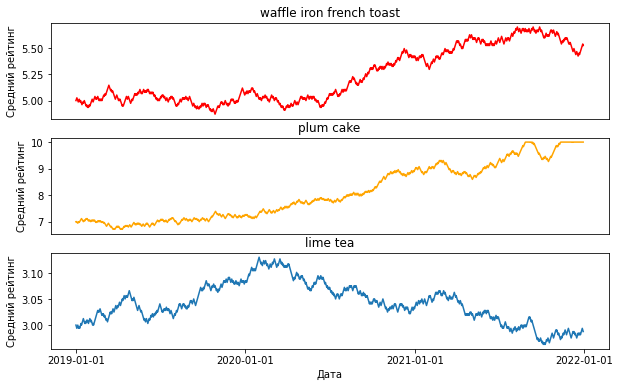

In [45]:
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].plot(dr, data[0], color='red')
ax[0].xaxis.set_major_locator(mdates.YearLocator(1))
ax[0].set_title('waffle iron french toast')
ax[0].set_ylabel('Средний рейтинг')
ax[0].axes.get_xaxis().set_visible(False)
 
ax[1].plot(dr, data[1], color='orange')
ax[1].xaxis.set_major_locator(mdates.YearLocator(1))
ax[1].set_title('plum cake')
ax[1].set_ylabel('Средний рейтинг')
ax[1].axes.get_xaxis().set_visible(False)
ax[2].plot(dr, data[2])
ax[2].xaxis.set_major_locator(mdates.YearLocator(1))
ax[2].set_title('lime tea')
ax[2].set_xlabel('Дата')
ax[2].set_ylabel('Средний рейтинг')
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


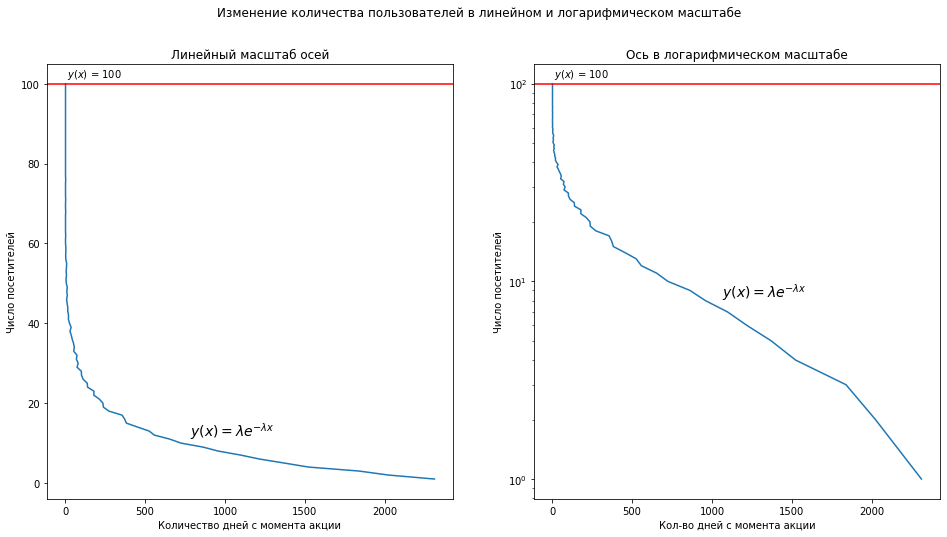

In [47]:
data4 = np.load("/content/visitors.npy")
y=[i for i in range(1, len(data4) + 1)]
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
formula = r'$y(x)=\lambda e^{-\lambda x}$'
ax[0].plot(data4, y)
ax[0].set_xlabel("Количество дней с момента акции")
ax[0].axhline(y = 100, color = 'r', linestyle = '-')
ax[0].text(.56, .18, formula, ha='right', va='top', fontsize = 14, transform = ax[0].transAxes)
ax[0].text(.05, .97, '$\ity$($\itx$) = 100', fontsize = 10, transform = ax[0].transAxes)
ax[0].set_ylabel("Число посетителей")
ax[0].set_title('Линейный масштаб осей')

ax[1].semilogy(data4, y)
ax[1].set_xlabel("Кол-во дней с момента акции")
ax[1].axhline(y=100, color='r', linestyle='-')
ax[1].text(.67, .5, formula, ha = 'right', va = 'top', fontsize = 14, transform = ax[1].transAxes)
ax[1].text(.05, .97, '$\ity$($\itx$) = 100', fontsize = 10, transform = ax[1].transAxes)
ax[1].set_ylabel("Число посетителей")
ax[1].set_title('Ось в логарифмическом масштабе')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()